## DNN(MLP) 모델을 이용한 MNIST 데이터 셋 분류

In [ ]:
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

* Step 1-1. Inptu tensor 와 Target tensor 준비(훈련데이터)

In [ ]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
print(train_images.shape)
print(train_labels.shape)

(60000, 28, 28)
(60000,)


In [ ]:
train_images[0].shape

(28, 28)

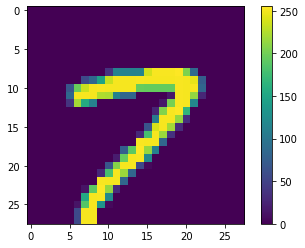

In [ ]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
train_labels[0]

5

* Step 1-2. 입력데이터의 전처리 

In [ ]:
# (60000, 28, 28) => (60000, 28*28)
train_images = train_images.reshape((60000, 28*28))

In [ ]:
print(train_images.shape)

(60000, 784)


In [ ]:
print(test_images.shape)

(10000, 28, 28)


In [ ]:
test_images = test_images.reshape((10000, 28*28))

In [ ]:
print(test_images.shape)

(10000, 784)


* Step2. DNN(MLP) 모델 디자인

In [ ]:
from tensorflow.keras import models, layers

In [ ]:
model = models.Sequential()
# hdden layer 256 퍼셉트론
model.add(layers.Dense(units=256, activation='relu', input_shape=(28*28,)))
model.add(layers.Dense(units=10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 10)                2570      
                                                                 
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


* Step 3. 모델의 학습 정보 설정

In [ ]:
# loss, optimizer, metric
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

* Step 4. 모델에 input, target 데이터 연결 후 학습

In [ ]:
history = model.fit(x=train_images, y=train_labels,
                    epochs=30,
                    batch_size=128,
                    validation_split=0.2)

* 학습 과정 시각화 및 테스트

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

In [ ]:
acc

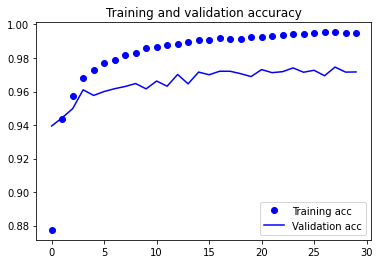

In [ ]:
epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.show()

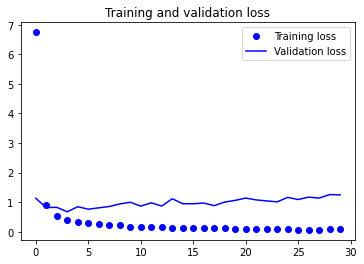

In [ ]:
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
test_loss, test_acc = model.evaluate(x=test_images, y=test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 1.1320 - accuracy: 0.9739


In [ ]:
import numpy as np

In [ ]:
predict = model.predict(test_images[0].reshape((1, 28*28)))

In [ ]:
predict

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]], dtype=float32)

In [ ]:
print(np.argmax(predict[0]))

7


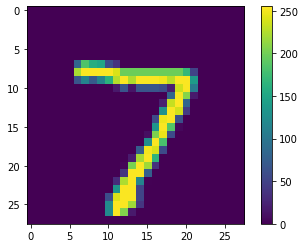

In [ ]:
plt.figure()
plt.imshow(test_images[0].reshape(28, 28))
plt.colorbar()
plt.grid(False)
plt.show()